In [ ]:

import tensorflow.keras.backend as K
K.clear_session()

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler

import keras
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical

from keras.callbacks import ReduceLROnPlateau


%matplotlib inline

%run cnn_wavelet.ipynb import WaveletNet
%run sequential_model.ipynb import SequentialModel

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.metrics import Precision, Recall



Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Model: "wavelet_net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ wavelet_layer_transformation    │ ?                      │   0 (unbuilt) │
│ (WaveletLayerTransformation)    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,376,292 (16.69 MB)

 Trainable params: 4,376,292 (16.69 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape as Wavelete expect 28x28 input instead of 32x32
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalizing pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# split tests and dataset classes
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=45)
y_train_one_hot = to_categorical(y_train, num_classes=100)
y_test_one_hot = to_categorical(y_test, num_classes=100)

print('The one hot label is:', y_train_one_hot[1])


The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
K.clear_session()

# Data Augmentation
data_generator = ImageDataGenerator(
    rotation_range=15,         # Random rotation (max 15 degrees)
    width_shift_range=0.1,     # Shift image width by 10%
    height_shift_range=0.1,    # Shift image height by 10%
    horizontal_flip=True,      # Flip image horizontally
    zoom_range=0.2,            # Random zoom
    shear_range=0.2,           # Shear transformation
    fill_mode='nearest'        # Fill missing pixels
)

batch_size = 32
data_generator.fit(x_train)

train_generator = data_generator.flow(
    x_train,
    y_train_one_hot,
    batch_size=batch_size
)

%run cnn_wavelet.ipynb import WaveletNet
%run cnn_se_res.ipynb import SeResNet

# Initialize models
model_wavelet = WaveletNet().main()
model_cnn = SeqModel().main()

histories = []

lr_scheduler = ReduceLROnPlateau(
    monitor="val_loss", factor=0.0001, patience=3, min_lr=1e-7
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.005,  # Reduce learning rate by half
    patience=5,  # Wait for 3 epochs of no improvement before reducing
    min_lr=1e-5  # Minimum learning rate
)

for model in [model_wavelet]:
    #optimizer = SGD(learning_rate=0.0001, momentum=0.9)
    optimizer = Adam(learning_rate=0.0005, beta_1=0.3, beta_2=0.999, epsilon=1e-7)


    # Compile the model
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # Train the model
    print(f'Running fit/history for {model.name}')
    histories.append({
        'name': model.name,
        'hist': model.fit(
            train_generator,
            validation_data=(x_test, y_test_one_hot),
            epochs=400,
            steps_per_epoch=x_train.shape[0] // batch_size,
            validation_steps=x_test.shape[0] // batch_size,  # Add validation_steps
            batch_size=batch_size
        )
    })

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wavelet_layer_transformation    │ (None, 28, 28, 1)      │             0 │
│ (WaveletLayerTransformation)    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 234,980 (917.89 KB)

 Trainable params: 234,980 (917.89 KB)

 Non-trainable params: 0 (0.00 B)

/Users/rondineli/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,376,292 (16.69 MB)

 Trainable params: 4,376,292 (16.69 MB)

 Non-trainable params: 0 (0.00 B)

Running fit/history for functional_2
Epoch 1/400


/Users/rondineli/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.0959 - loss: 2.7853 - val_accuracy: 0.1029 - val_loss: 2.3383
Epoch 2/400
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.1024 - loss: 2.3448 - val_accuracy: 0.1135 - val_loss: 2.3287
Epoch 3/400
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.1005 - loss: 2.3379 - val_accuracy: 0.1135 - val_loss: 2.3199
Epoch 4/400
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.0996 - loss: 2.3347 - val_accuracy: 0.1158 - val_loss: 2.3186
Epoch 5/400
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.1355 - loss: 2.2960 - val_accuracy: 0.2497 - val_loss: 2.0917
Epoch 6/400
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.2158 - loss: 2.1355 - val_accuracy: 0.2628 - val_loss: 2.0052
Epoch 7/400
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.2687 - loss: 2.0121 - val_accuracy: 0.4049 - val_loss: 1.8024
Epoch 8/400
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.3178 - los

{'name': 'functional_2', 'hist': <keras.src.callbacks.history.History object at 0x3fd113640>}


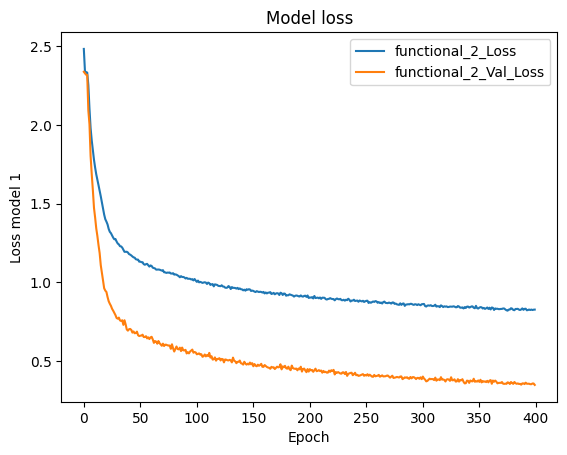

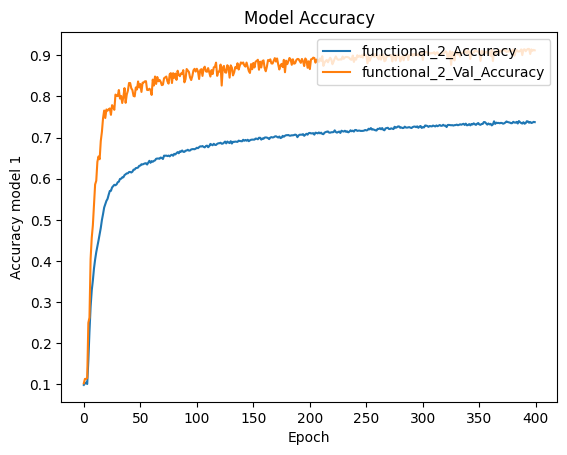

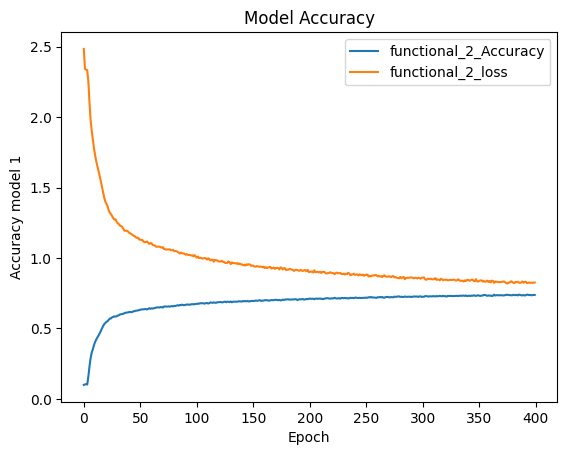

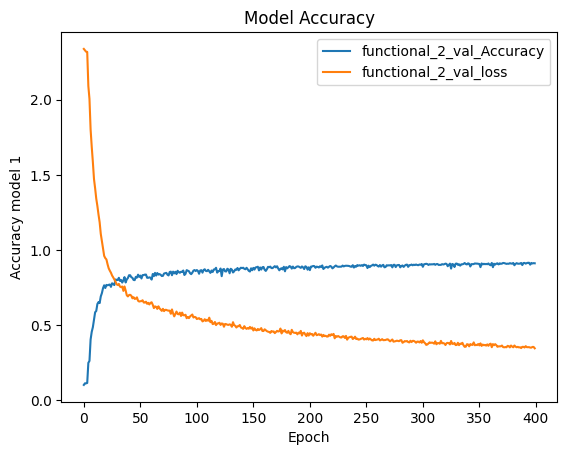

In [80]:
import matplotlib.pyplot as plt

leg = []

for h in histories:
    print(h)
    leg.append(f'{h["name"]}_Loss')
    leg.append(f'{h["name"]}_Val_Loss')
    plt.plot(h['hist'].history['loss'])
    plt.plot(h['hist'].history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss model 1')
plt.xlabel('Epoch')

plt.legend(leg, loc='upper right')
plt.savefig("400_epochs_loss.png", dpi=300)
plt.show()


#import matplotlib.pyplot as plt
#plt.plot(hist.history['accuracy'])
#plt.plot(hist.history['val_accuracy'])
#plt.title(f'Model Accuracy')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Val'], loc='upper right')
#plt.show()


leg = []
import matplotlib.pyplot as plt

for h in [histories[0]]:
    leg.append(f'{h["name"]}_Accuracy')
    leg.append(f'{h["name"]}_Val_Accuracy')
    plt.plot(h['hist'].history['accuracy'])
    plt.plot(h['hist'].history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy model 1')
plt.xlabel('Epoch')

plt.legend(leg, loc='upper right')
plt.show()

leg = []
import matplotlib.pyplot as plt

for h in [histories[0]]:
    leg.append(f'{h["name"]}_Accuracy')
    leg.append(f'{h["name"]}_loss')
    plt.plot(h['hist'].history['accuracy'])
    plt.plot(h['hist'].history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy model 1')
plt.xlabel('Epoch')
plt.legend(leg, loc='upper right')
plt.show()

leg = []
import matplotlib.pyplot as plt

for h in [histories[0]]:
    leg.append(f'{h["name"]}_val_Accuracy')
    leg.append(f'{h["name"]}_val_loss')
    plt.plot(h['hist'].history['val_accuracy'])
    plt.plot(h['hist'].history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy model 1')
plt.xlabel('Epoch')
plt.legend(leg, loc='upper right')
plt.show()


In [81]:

for hist in histories:
    train_acc = hist['hist'].history['accuracy']
    val_acc = hist['hist'].history['val_accuracy']

    print(f"[{hist['name']}] Acc: {train_acc}")
    print(f"[{hist['name']}] Val_Acc: {val_acc}")

    train_improvement = ((train_acc[-1] - train_acc[0]) / train_acc[0]) * 100
    val_improvement = ((val_acc[-1] - val_acc[0]) / val_acc[0]) * 100

    print(f"[{hist['name']}] Training Accuracy Improvement: {train_improvement:.2f}%")
    print(f"[{hist['name']}] Validation Accuracy Improvement: {val_improvement:.2f}%")

[functional_2] Acc: [0.0988750010728836, 0.10229166597127914, 0.10462500154972076, 0.10108333081007004, 0.15802083909511566, 0.22875000536441803, 0.28862500190734863, 0.32850000262260437, 0.3527291715145111, 0.38222917914390564, 0.4036875069141388, 0.4215833246707916, 0.4351041615009308, 0.44997915625572205, 0.4645625054836273, 0.4803749918937683, 0.49966666102409363, 0.5140208601951599, 0.5299791693687439, 0.5381875038146973, 0.5462291836738586, 0.5511041879653931, 0.5612499713897705, 0.5702916383743286, 0.570604145526886, 0.5788124799728394, 0.5819374918937683, 0.5852291584014893, 0.5841458439826965, 0.5863541960716248, 0.5914583206176758, 0.5929166674613953, 0.5994374752044678, 0.5999583601951599, 0.6034374833106995, 0.6034166812896729, 0.6087291836738586, 0.6107708215713501, 0.6129791736602783, 0.6132083535194397, 0.6162291765213013, 0.6165624856948853, 0.6151458621025085, 0.6171249747276306, 0.622041642665863, 0.6223541498184204, 0.6258541941642761, 0.6262291669845581, 0.627145826